In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy import ndimage
import scipy.ndimage.filters
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import log_loss
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
k = 5
p = 49

In [7]:
V_real = np.load("real_v_maps.npy")
V_pred = np.load("predicted_v_maps.npy")
V_pred_jean = np.load("predicted_v_maps_jean.npy")

In [4]:
V_real.shape

(5, 49, 49)

In [5]:
V_pred.shape

(2401, 5)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_4664/2809258506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


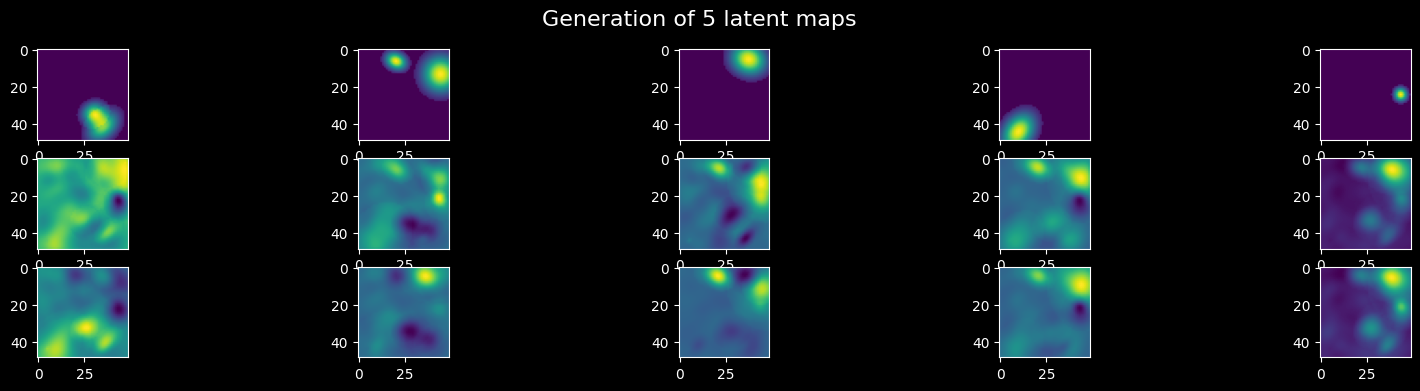

In [8]:
fig, ax = plt.subplots(3,k, figsize=(20, 4))
fig.suptitle('Generation of 5 latent maps',fontsize=16)
for i in range(k):
    ax[0][i].imshow(V_real[i])
    ax[1][i].imshow(V_pred.transpose((1, 0))[i].reshape(p,p))
    ax[2][i].imshow(V_pred_jean.transpose((1, 0))[i].reshape(p,p))
fig.show()

In [10]:
a = np.random.normal(size=100)
b = a


array([[1., 1.],
       [1., 1.]])

In [28]:
def get_corr_matrix(V_maps1: np.ndarray, V_maps2:np.ndarray):
    """
    V_maps1 and V_maps2 are arrays of size (k, p, p) where
    -k is the number of components in the map
    -p is the grid size 
    """
    k , p, _ = V_maps1.shape
    corr_matrix = np.zeros((k,k))
    for i in range(k):
        for j in range(i, k):
            #print(np.corrcoef(V_maps1[i].ravel(),V_maps2[j].ravel())[0, 1])
            corr_matrix[i, j] = np.abs(np.corrcoef(V_maps1[i].ravel(),V_maps2[j].ravel())[0, 1])
            corr_matrix[j, i] = corr_matrix[i, j]
    return corr_matrix
            

In [29]:
V_pred.shape

(2401, 5)

In [48]:
V_maps_pred = V_pred.transpose((1, 0)).reshape(k,p,p)
V_maps_pred_jean = V_pred_jean.transpose((1, 0)).reshape(k,p,p)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_4664/689356480.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


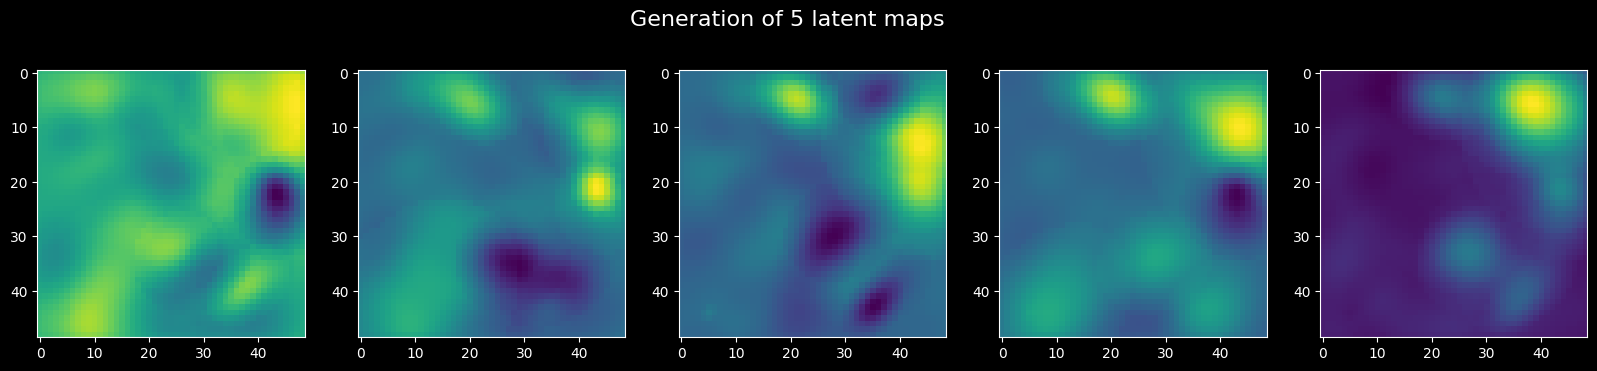

In [49]:
fig, ax = plt.subplots(1,k, figsize=(20, 4))
fig.suptitle('Generation of 5 latent maps',fontsize=16)
for i in range(k):
    ax[i].imshow(V_maps_pred[i])
    
fig.show()

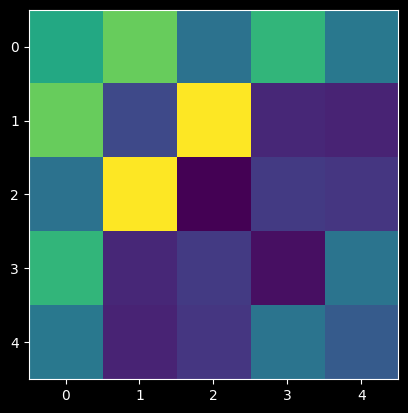

In [59]:
corr_matrix = get_corr_matrix(V_maps_pred_jean, V_real)
plt.imshow(corr_matrix)

In [60]:
def greedy_matching(set_1, set_2, corr_matrix):
    matched_indices = set()
    matched_pairs = []

    # Iterate through set_1
    for i in range(len(set_1)):
        max_corr = -np.inf
        best_pair = None

        # Iterate through set_2 to find the best unmatched pair
        for j in range(len(set_2)):
            if j not in matched_indices:
                if corr_matrix[i, j] > max_corr:
                    max_corr = corr_matrix[i, j]
                    best_pair = (i, j)

        # Mark the best pair as matched
        if best_pair:
            matched_indices.add(best_pair[1])
            matched_pairs.append(best_pair)

    # Reorder set_2 based on the matched pairs
    reordered_set_2 = [set_2[j] for i, j in sorted(matched_pairs)]

    return reordered_set_2


In [61]:
corr_matrix = get_corr_matrix(V_real, V_maps_pred_jean)
V_maps_jean_reordered = greedy_matching(V_real, V_maps_pred_jean, corr_matrix)

In [ ]:
def reorder_maps(real_latent_maps, predicted_maps):
    """
    Inputs: 
    -real_latent_maps: array of size (k, p, p) where k is the number of components and p grid size
    -predicted_maps: array of size (k, p, p) where k is the number of components and p grid size
    """
    corr_matrix = get_corr_matrix(real_latent_maps, predicted_maps)
    predicted_maps_reordered = greedy_matching(real_latent_maps, predicted_maps, corr_matrix)

    return predicted_maps_reordered

In [62]:
V_maps_pred_jean.shape

(5, 49, 49)

/var/folders/9k/c2_qmgms5bv_gzkb9tf_tc1w0000gn/T/ipykernel_4664/1066963703.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


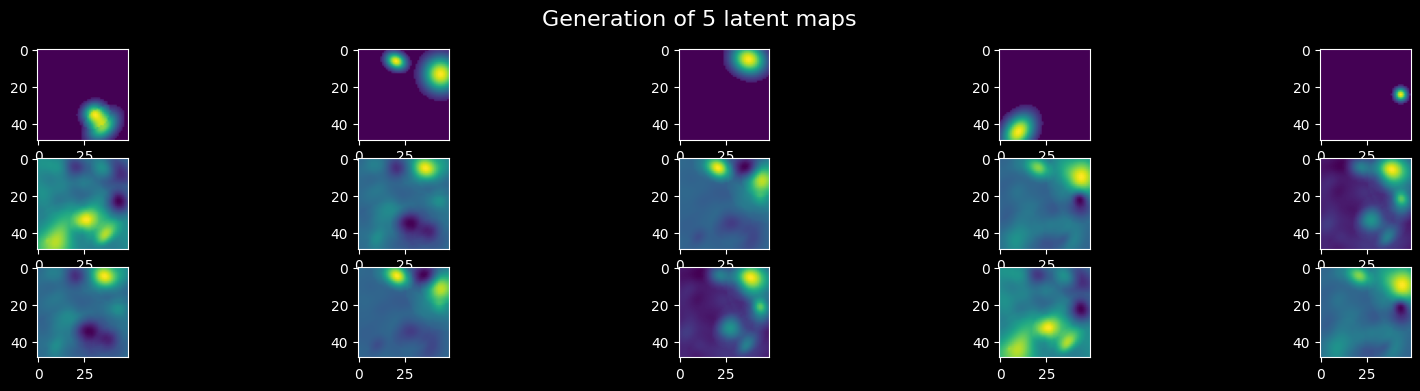

In [63]:
fig, ax = plt.subplots(3,k, figsize=(20, 4))
fig.suptitle('Generation of 5 latent maps',fontsize=16)
for i in range(k):
    ax[0][i].imshow(V_real[i])
    ax[1][i].imshow(V_maps_pred_jean[i])
    ax[2][i].imshow(V_maps_jean_reordered[i])
fig.show()